In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/HOME_CREDIT/'

In [3]:
#n_rows = None to load all file

In [5]:
n_rows = 50000

In [301]:
train = pd.read_csv(f"{PATH}application_train.csv", nrows = n_rows )


In [302]:
test = pd.read_csv(f"{PATH}application_test.csv", nrows=n_rows)

In [303]:
train.shape, test.shape

((50000, 122), (48744, 121))

* AMT_INCOME_TOTAL - доход клиента
* AMT_ANNUITY - ежемесячный платеж по кредиту с учетом процента и основной суммы долга
* AMT_CREDIT - основная сумма кредита
* AMT_GOODS_PRICE - стоимость товара по которому был дан кредит


- CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
- ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
- CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
- DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age


- AMT_CREDIT/ AMT_ANNUITY - период выплаты долга
- AMT_CREDIT/ AMT_INCOME_TOTAL - запас 
- AMT_ANNUITY/ AMT_INCOME_TOTAL - coverage per month
- DAYS_EMPLOYED/DAYS_BIRTH - как долго работает относительно возраста

In [206]:
train.shape, test.shape

((50000, 122), (48744, 121))

In [8]:
train["AMT_CREDIT_to_AMT_ANNUITY"] = train.AMT_CREDIT/ train.AMT_ANNUITY
train["AMT_CREDIT_to_AMT_INCOME_TOTAL"] = train.AMT_CREDIT/train.AMT_INCOME_TOTAL
train["AMT_ANNUITY_to_AMT_INCOME_TOTAL"] = train.AMT_ANNUITY/train.AMT_INCOME_TOTAL
train["DAYS_EMPLOYED_to_DAYS_BIRTH"] = train.DAYS_EMPLOYED/train.DAYS_BIRTH

In [9]:
test["AMT_CREDIT_to_AMT_ANNUITY"] = test.AMT_CREDIT/ test.AMT_ANNUITY
test["AMT_CREDIT_to_AMT_INCOME_TOTAL"] = test.AMT_CREDIT/test.AMT_INCOME_TOTAL
test["AMT_ANNUITY_to_AMT_INCOME_TOTAL"] = test.AMT_ANNUITY/test.AMT_INCOME_TOTAL
test["DAYS_EMPLOYED_to_DAYS_BIRTH"] = test.DAYS_EMPLOYED/test.DAYS_BIRTH

In [10]:
train.CODE_GENDER = train.CODE_GENDER != "M"

In [11]:
test.CODE_GENDER = test.CODE_GENDER != "M"

In [12]:
train.FLAG_OWN_CAR = train.FLAG_OWN_CAR != "N"

In [13]:
test.FLAG_OWN_CAR = test.FLAG_OWN_CAR != "N"

In [14]:
train.FLAG_OWN_REALTY = train.FLAG_OWN_REALTY != "N"

In [15]:
test.FLAG_OWN_REALTY = test.FLAG_OWN_REALTY != "N"

In [179]:
# то же самое для test

In [16]:
documents = np.arange(2, 22)

In [17]:
documents

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])

In [18]:
i = 5
"FLAG_"+ str(i)

'FLAG_5'

In [19]:
for d in documents:
    train["FLAG_DOCUMENT_"+ str(d)] = train["FLAG_DOCUMENT_"+ str(d)] != 0

In [20]:
for d in documents:
    test["FLAG_DOCUMENT_"+ str(d)] = test["FLAG_DOCUMENT_"+ str(d)] != 0

In [21]:
train.FLAG_DOCUMENT_2.unique()

array([False,  True])

In [186]:
#все continuous variables нормализовать и избавиться от nan

In [22]:
for c in train.columns:
    if(str(c).startswith("FLAG")):
        train[str(c)] = train[str(c)] != 0

In [23]:
for c in test.columns:
    if(str(c).startswith("FLAG")):
        test[str(c)] = test[str(c)] != 0

In [189]:
#то же самое с test

In [190]:
#подумать что делать с характеристикой жилья

In [191]:
#может стоит создать месяц год а не модифицировать дни?

In [192]:
train.DAYS_BIRTH.describe()

count    50000.000000
mean    -16022.110060
std       4361.383144
min     -25184.000000
25%     -19644.000000
50%     -15731.000000
75%     -12378.750000
max      -7680.000000
Name: DAYS_BIRTH, dtype: float64

In [193]:
(train.isnull().sum()/train.shape[0])[45:91] #потчи половины информации везде нет

BASEMENTAREA_AVG                0.58400
YEARS_BEGINEXPLUATATION_AVG     0.48790
YEARS_BUILD_AVG                 0.66480
COMMONAREA_AVG                  0.69922
ELEVATORS_AVG                   0.53304
ENTRANCES_AVG                   0.50392
FLOORSMAX_AVG                   0.49752
FLOORSMIN_AVG                   0.67790
LANDAREA_AVG                    0.59444
LIVINGAPARTMENTS_AVG            0.68454
LIVINGAREA_AVG                  0.50276
NONLIVINGAPARTMENTS_AVG         0.69430
NONLIVINGAREA_AVG               0.55146
APARTMENTS_MODE                 0.50772
BASEMENTAREA_MODE               0.58400
YEARS_BEGINEXPLUATATION_MODE    0.48790
YEARS_BUILD_MODE                0.66480
COMMONAREA_MODE                 0.69922
ELEVATORS_MODE                  0.53304
ENTRANCES_MODE                  0.50392
FLOORSMAX_MODE                  0.49752
FLOORSMIN_MODE                  0.67790
LANDAREA_MODE                   0.59444
LIVINGAPARTMENTS_MODE           0.68454
LIVINGAREA_MODE                 0.50276


получается что максимальное число лет работы составляет 1000 лет, это странно нарисуем гистограмму

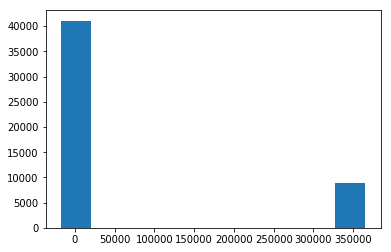

In [24]:
plt.hist(train.DAYS_EMPLOYED);

In [25]:
anom_employed = train[train.DAYS_EMPLOYED == 365243]
nonanom_employed = train[train.DAYS_EMPLOYED != 365243]
print(f"default anomalies {anom_employed['TARGET'].mean()*100} %")
print(f"default not anomalies {nonanom_employed['TARGET'].mean()*100} %")

default anomalies 5.636485880770955 %
default not anomalies 8.576784497029896 %


In [64]:
#надо заменить значения на np.nan и создать доп колонку чтобы показать что значения равны nan

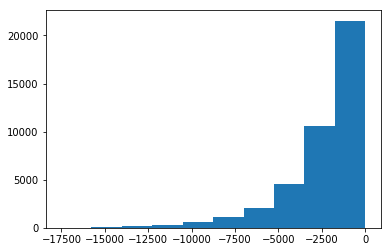

In [26]:
plt.hist(nonanom_employed.DAYS_EMPLOYED);

Correlations with TARGET

In [66]:
corr_target = train.corr()["TARGET"].sort_values()

print(corr_target.head(10))
print(corr_target.tail(10))

EXT_SOURCE_3                 -0.181276
EXT_SOURCE_2                 -0.158426
EXT_SOURCE_1                 -0.156806
CODE_GENDER                  -0.058687
AMT_GOODS_PRICE              -0.041301
REGION_POPULATION_RELATIVE   -0.040797
FLOORSMAX_AVG                -0.040707
DAYS_EMPLOYED                -0.040292
FLOORSMAX_MEDI               -0.039939
FLOORSMAX_MODE               -0.039418
Name: TARGET, dtype: float64
DEF_60_CNT_SOCIAL_CIRCLE       0.044242
FLAG_DOCUMENT_3                0.045046
DAYS_ID_PUBLISH                0.046925
REG_CITY_NOT_WORK_CITY         0.048438
DAYS_LAST_PHONE_CHANGE         0.056131
REGION_RATING_CLIENT           0.066131
REGION_RATING_CLIENT_W_CITY    0.067080
DAYS_BIRTH                     0.076792
TARGET                         1.000000
FLAG_DOCUMENT_12                    NaN
Name: TARGET, dtype: float64


Days_birth has positive correlation, but it has negative value, so getting older probability of default is less as expected

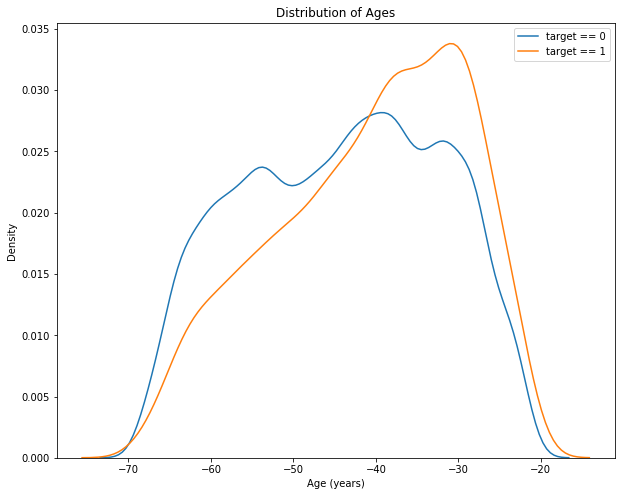

In [27]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

видно что гистограмма при дефолте смещена влево, т.е. когда клиенты молодые им тяжелее выплачивать кредит

# Bureau

In [28]:
bureau = pd.read_csv(f"{PATH}bureau.csv", nrows = n_rows)

In [133]:
bureau.isnull().sum()/bureau.shape[0]

SK_ID_CURR                0.00000
SK_ID_BUREAU              0.00000
CREDIT_ACTIVE             0.00000
CREDIT_CURRENCY           0.00000
DAYS_CREDIT               0.00000
CREDIT_DAY_OVERDUE        0.00000
DAYS_CREDIT_ENDDATE       0.06302
DAYS_ENDDATE_FACT         0.38444
AMT_CREDIT_MAX_OVERDUE    0.64048
CNT_CREDIT_PROLONG        0.00000
AMT_CREDIT_SUM            0.00000
AMT_CREDIT_SUM_DEBT       0.15258
AMT_CREDIT_SUM_LIMIT      0.33968
AMT_CREDIT_SUM_OVERDUE    0.00000
CREDIT_TYPE               0.00000
DAYS_CREDIT_UPDATE        0.00000
AMT_ANNUITY               0.79502
dtype: float64

# Count number of loans for each client 

In [29]:
def join_df(left, right, left_on, right_on=None, how="left", suffix="_y"):
    if right_on == None: right_on = left_on
    return left.merge(right, how = how, left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [315]:
prev_loans = bureau.groupby("SK_ID_CURR",as_index=False)["SK_ID_BUREAU"].count().rename(columns={"SK_ID_BUREAU": "prev_loans_counts"})

In [316]:
prev_loans.head()

,SK_ID_CURR,prev_loans_counts
0,100016,6
1,100053,7
2,100165,2
3,100166,13
4,100294,5


In [32]:
def count_categorical(df, group_var, df_name):
    """Computes counts and normalized counts for each observation
    of `group_var` of each unique category in every categorical variable
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    group_var : string
        The variable by which to group the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with counts and normalized counts of each unique category in every categorical variable
        with one row for every unique value of the `group_var`.
        
    """
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['sum']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [33]:
def agg_numeric(df, group_var, df_name):
    """Aggregates the numeric values in a dataframe. This can
    be used to create features for each instance of the grouping variable.
    
    Parameters
    --------
        df (dataframe): 
            the dataframe to calculate the statistics on
        group_var (string): 
            the variable by which to group df
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated for 
            all numeric columns. Each instance of the grouping variable will have 
            the statistics (mean, min, max, sum; currently supported) calculated. 
            The columns are also renamed to keep track of features created.
    
    """
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count','mean', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [308]:
prev_loans_cat = count_categorical(bureau,"SK_ID_CURR", "bur")

In [309]:
prev_loans_cat.columns

Index(['bur_CREDIT_ACTIVE_Active_sum', 'bur_CREDIT_ACTIVE_Bad debt_sum',
       'bur_CREDIT_ACTIVE_Closed_sum', 'bur_CREDIT_ACTIVE_Sold_sum',
       'bur_CREDIT_CURRENCY_currency 1_sum',
       'bur_CREDIT_CURRENCY_currency 2_sum',
       'bur_CREDIT_CURRENCY_currency 3_sum',
       'bur_CREDIT_CURRENCY_currency 4_sum',
       'bur_CREDIT_TYPE_Another type of loan_sum',
       'bur_CREDIT_TYPE_Car loan_sum', 'bur_CREDIT_TYPE_Consumer credit_sum',
       'bur_CREDIT_TYPE_Credit card_sum',
       'bur_CREDIT_TYPE_Loan for business development_sum',
       'bur_CREDIT_TYPE_Loan for working capital replenishment_sum',
       'bur_CREDIT_TYPE_Microloan_sum', 'bur_CREDIT_TYPE_Mortgage_sum',
       'bur_CREDIT_TYPE_Real estate loan_sum',
       'bur_CREDIT_TYPE_Unknown type of loan_sum'],
      dtype='object')

In [310]:
bureau_cat = join_df(prev_loans, prev_loans_cat, left_on = "SK_ID_CURR")

In [311]:
bureau_cat.head()

,SK_ID_CURR,prev_loans_counts,bur_CREDIT_ACTIVE_Active_sum,bur_CREDIT_ACTIVE_Bad debt_sum,bur_CREDIT_ACTIVE_Closed_sum,bur_CREDIT_ACTIVE_Sold_sum,bur_CREDIT_CURRENCY_currency 1_sum,bur_CREDIT_CURRENCY_currency 2_sum,bur_CREDIT_CURRENCY_currency 3_sum,bur_CREDIT_CURRENCY_currency 4_sum,bur_CREDIT_TYPE_Another type of loan_sum,bur_CREDIT_TYPE_Car loan_sum,bur_CREDIT_TYPE_Consumer credit_sum,bur_CREDIT_TYPE_Credit card_sum,bur_CREDIT_TYPE_Loan for business development_sum,bur_CREDIT_TYPE_Loan for working capital replenishment_sum,bur_CREDIT_TYPE_Microloan_sum,bur_CREDIT_TYPE_Mortgage_sum,bur_CREDIT_TYPE_Real estate loan_sum,bur_CREDIT_TYPE_Unknown type of loan_sum
0,100016,6,3,0,3,0,6,0,0,0,0,0,6,0,0,0,0,0,0,0
1,100053,7,1,0,6,0,7,0,0,0,0,0,5,2,0,0,0,0,0,0
2,100165,2,0,0,2,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0
3,100166,13,2,0,11,0,13,0,0,0,0,0,12,1,0,0,0,0,0,0
4,100294,5,1,0,4,0,5,0,0,0,0,0,4,1,0,0,0,0,0,0


In [149]:
#разобрался с credit active 

In [312]:
train = join_df(train,prev_loans, how = "left", left_on = "SK_ID_CURR")

In [313]:
test = join_df(test ,prev_loans, how = "left", left_on = "SK_ID_CURR")

In [314]:
train.shape, test.shape

((50000, 124), (48744, 123))

In [40]:
def kde_with_target(col,target, df):
    corr = df[str(target)].corr(df[str(col)])
    avg_repaid = df.ix[df[target] == 0, col].median()
    avg_not_repaid = df.ix[df[target] == 1, col].median()
    
    sns.kdeplot(df.ix[df[target] == 0, col], label = 'TARGET == 0')
    sns.kdeplot(df.ix[df['TARGET'] == 1, col], label = 'TARGET == 1')
    
    plt.xlabel(col); plt.ylabel('Density'); plt.title('%s Distribution' % col)
    plt.legend();
    
    print(f"average repaid loans : {avg_repaid}")
    print(f"average not repaid loans : {avg_not_repaid}")

C:\Users\Shota\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shota\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\Shota\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable

average repaid loans : 0.5460231970049609
average not repaid loans : 0.3791004853998145


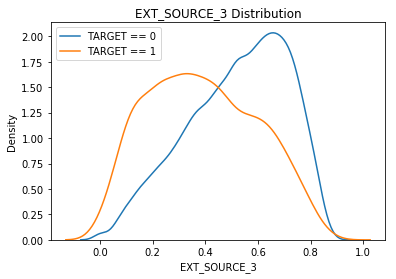

In [41]:
kde_with_target('EXT_SOURCE_3', "TARGET", train)

Больше EXT_SOURCE_3 больше выплаченных кредитов

- AMT_CREDIT_SUM_DEBT/AMT_CREDIT_SUM покажет истинное соотношение относительно каждого клиента

In [42]:
bureau["AMT_CREDIT_DEBT_to_AMT_CREDIT_SUM"] = bureau.AMT_CREDIT_SUM_DEBT/bureau.AMT_CREDIT_SUM

In [43]:
bureau["AMT_CREDIT_SUM_to_AMT_ANNUITY"] = bureau.AMT_CREDIT_SUM/bureau.AMT_ANNUITY

In [44]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,AMT_CREDIT_DEBT_to_AMT_CREDIT_SUM,AMT_CREDIT_SUM_to_AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,0.00000,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,0.76152,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN,NaN


In [45]:
bureau.AMT_CREDIT_DEBT_to_AMT_CREDIT_SUM = bureau.AMT_CREDIT_DEBT_to_AMT_CREDIT_SUM.fillna(0)
bureau.AMT_CREDIT_SUM_to_AMT_ANNUITY = bureau.AMT_CREDIT_SUM_to_AMT_ANNUITY.fillna(0)

In [113]:
#numeric bureau

In [122]:
#bureau_numeric = bureau.select_dtypes("number")

In [210]:
bureau_numeric_agg = agg_numeric(bureau, "SK_ID_CURR", "bur_agg")

C:\Users\Shota\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [211]:
bureau_cat_numeric = join_df(bureau_cat, bureau_numeric_agg, left_on="SK_ID_CURR")

In [317]:
train = join_df(train, bureau_cat_numeric, left_on="SK_ID_CURR")

In [318]:
test = join_df(test, bureau_cat_numeric, left_on="SK_ID_CURR")

In [319]:
train.shape, test.shape

((50000, 185), (48744, 184))

In [51]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bur_agg_DAYS_CREDIT_UPDATE_sum,bur_agg_AMT_ANNUITY_count,bur_agg_AMT_ANNUITY_mean,bur_agg_AMT_ANNUITY_sum,bur_agg_AMT_CREDIT_DEBT_to_AMT_CREDIT_SUM_count,bur_agg_AMT_CREDIT_DEBT_to_AMT_CREDIT_SUM_mean,bur_agg_AMT_CREDIT_DEBT_to_AMT_CREDIT_SUM_sum,bur_agg_AMT_CREDIT_SUM_to_AMT_ANNUITY_count,bur_agg_AMT_CREDIT_SUM_to_AMT_ANNUITY_mean,bur_agg_AMT_CREDIT_SUM_to_AMT_ANNUITY_sum
0,100002,1,Cash loans,False,False,True,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,True,False,False,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,False,True,True,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,True,False,True,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,False,False,True,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,bur_agg_DAYS_CREDIT_UPDATE_sum,bur_agg_AMT_ANNUITY_count,bur_agg_AMT_ANNUITY_mean,bur_agg_AMT_ANNUITY_sum,bur_agg_AMT_CREDIT_DEBT_to_AMT_CREDIT_SUM_count,bur_agg_AMT_CREDIT_DEBT_to_AMT_CREDIT_SUM_mean,bur_agg_AMT_CREDIT_DEBT_to_AMT_CREDIT_SUM_sum,bur_agg_AMT_CREDIT_SUM_to_AMT_ANNUITY_count,bur_agg_AMT_CREDIT_SUM_to_AMT_ANNUITY_mean,bur_agg_AMT_CREDIT_SUM_to_AMT_ANNUITY_sum
0,100001,Cash loans,True,False,True,0,135000.0,568800.0,20560.5,450000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100005,Cash loans,False,False,True,0,99000.0,222768.0,17370.0,180000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100013,Cash loans,False,True,True,0,202500.0,663264.0,69777.0,630000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100028,Cash loans,True,False,True,2,315000.0,1575000.0,49018.5,1575000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100038,Cash loans,False,True,False,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#calculate correlations with TARGET 

Если клиент брал кредит недавно то вероятность выплаты нового кредита меньше чем если он брал его давно

# Bureau balance

In [236]:
bureau_bal = pd.read_csv(f"{PATH}bureau_balance.csv",nrows = n_rows)

In [237]:
bureau_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [238]:
bureau_bal_cat = count_categorical(bureau_bal,"SK_ID_BUREAU","bal")

In [239]:
bureau_bal_status_counts = bureau_bal.groupby("SK_ID_BUREAU")["STATUS"].agg(["count"])

In [240]:
bureau_bal_cat = join_df(bureau_bal_cat, bureau_bal_status_counts, left_on="SK_ID_BUREAU")

In [241]:
bureau_bal_cat.head()

,bal_STATUS_0_sum,bal_STATUS_1_sum,bal_STATUS_2_sum,bal_STATUS_3_sum,bal_STATUS_4_sum,bal_STATUS_5_sum,bal_STATUS_C_sum,bal_STATUS_X_sum,count
SK_ID_BUREAU,,,,,,,,,
5212206,0,0,0,0,0,0,0,60,60
5212207,0,0,0,0,0,0,0,59,59
5212208,0,0,0,0,0,0,95,2,97
5212210,21,0,0,0,0,0,38,26,85
5212211,16,0,0,0,0,0,23,58,97


In [242]:
#bureau_bal_numeric = bureau_bal.groupby("SK_ID_BUREAU")["MONTHS_BALANCE"].agg(["mean","sum"])
#bureau_bal_numeric.head()

In [243]:
bureau_balance_agg = agg_numeric(bureau_bal, "SK_ID_BUREAU","bal")

C:\Users\Shota\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [244]:
# Counts of each type of status for each previous loan
bureau_balance_counts = count_categorical(bureau_bal, group_var = 'SK_ID_BUREAU', df_name = 'bureau_bal')
bureau_balance_counts.head()

,bureau_bal_STATUS_0_sum,bureau_bal_STATUS_1_sum,bureau_bal_STATUS_2_sum,bureau_bal_STATUS_3_sum,bureau_bal_STATUS_4_sum,bureau_bal_STATUS_5_sum,bureau_bal_STATUS_C_sum,bureau_bal_STATUS_X_sum
SK_ID_BUREAU,,,,,,,,
5212206,0,0,0,0,0,0,0,60
5212207,0,0,0,0,0,0,0,59
5212208,0,0,0,0,0,0,95,2
5212210,21,0,0,0,0,0,38,26
5212211,16,0,0,0,0,0,23,58


In [245]:
bureau_bal_cat.reset_index(inplace=True)

In [259]:
bureau_bal_cat_agg = join_df(bureau_bal_cat, bureau_balance_agg, left_on="SK_ID_BUREAU",how="outer")

In [260]:
bureau_bal_cat.head()

,SK_ID_BUREAU,bal_STATUS_0_sum,bal_STATUS_1_sum,bal_STATUS_2_sum,bal_STATUS_3_sum,bal_STATUS_4_sum,bal_STATUS_5_sum,bal_STATUS_C_sum,bal_STATUS_X_sum,count
0,5212206,0,0,0,0,0,0,0,60,60
1,5212207,0,0,0,0,0,0,0,59,59
2,5212208,0,0,0,0,0,0,95,2,97
3,5212210,21,0,0,0,0,0,38,26,85
4,5212211,16,0,0,0,0,0,23,58,97


In [261]:
bureau_bal_join = join_df(bureau[["SK_ID_CURR","SK_ID_BUREAU"]], bureau_bal_cat_agg, left_on="SK_ID_BUREAU")

In [262]:
bureau_bal_join.head()

,SK_ID_CURR,SK_ID_BUREAU,bal_STATUS_0_sum,bal_STATUS_1_sum,bal_STATUS_2_sum,bal_STATUS_3_sum,bal_STATUS_4_sum,bal_STATUS_5_sum,bal_STATUS_C_sum,bal_STATUS_X_sum,count,bal_MONTHS_BALANCE_count,bal_MONTHS_BALANCE_mean,bal_MONTHS_BALANCE_sum
0,215354,5714462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [320]:
# Merge with the value counts of bureau
train = join_df(train, bureau_bal_join.drop_duplicates(["SK_ID_CURR"]), left_on='SK_ID_CURR')

In [321]:
# Merge with the value counts of bureau
test = join_df(test, bureau_bal_join.drop_duplicates(["SK_ID_CURR"]), left_on = 'SK_ID_CURR')


In [322]:
test.shape, train.shape

((48744, 197), (50000, 198))

# CREDIT_CARD

In [66]:
credit_card = pd.read_csv(f"{PATH}credit_card_balance.csv",nrows=n_rows)

In [67]:
credit_card.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [68]:
credit_card_agg_curr = agg_numeric(credit_card.drop(["SK_ID_PREV"],axis=1),"SK_ID_CURR", "credit")

C:\Users\Shota\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [69]:
credit_card_agg_prev = agg_numeric(credit_card.drop(["SK_ID_CURR"],axis=1),"SK_ID_PREV", "prev")

C:\Users\Shota\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [85]:
def agg_numeric_second(df, group_var, df_name):
    """
    Groups and aggregates the numeric values in a child dataframe
    by the parent variable.
    
    Parameters
    --------
        df (dataframe): 
            the child dataframe to calculate the statistics on
        parent_var (string): 
            the parent variable used for grouping and aggregating
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated by the `parent_var` for 
            all numeric columns. Each observation of the parent variable will have 
            one row in the dataframe with the parent variable as the index. 
            The columns are also renamed using the `df_name`. Columns with all duplicate
            values are removed. 
    
    """
    
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    # Only want the numeric variables
    parent_ids = df[group_var].copy()
    numeric_df = df.select_dtypes('number').copy()
    numeric_df[group_var] = parent_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'sum'])
    agg.reset_index()

    # Need to create new column names
    columns = []

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))
    
    agg.columns = columns
    
    # Remove the columns with all redundant values
    _, idx = np.unique(agg, axis = 1, return_index=True)
    agg = agg.iloc[:, idx]
    
    return agg

In [92]:
def aggregate_client(df, group_vars, df_names):
    """Aggregate a dataframe with data at the loan level 
    at the client level
    
    Args:
        df (dataframe): data at the loan level
        group_vars (list of two strings): grouping variables for the loan 
        and then the client (example ['SK_ID_PREV', 'SK_ID_CURR'])
        names (list of two strings): names to call the resulting columns
        (example ['cash', 'client'])
        
    Returns:
        df_client (dataframe): aggregated numeric stats at the client level. 
        Each client will have a single row with all the numeric data aggregated
    """
    
    # Aggregate the numeric columns
    df_agg = agg_numeric_second(df, group_var= group_vars[0], df_name = df_names[0])
    #df_agg.set_index("SK_ID_CURR")
    
    # If there are categorical variables
    if any(df.dtypes == 'category'):
    
        # Count the categorical columns
        df_counts = agg_categorical(df, parent_var = group_vars[0], df_name = df_names[0])
        df_counts.reset_index()

        # Merge the numeric and categorical
        df_by_loan = df_counts.merge(df_agg, on = group_vars[0], how = 'outer')
        df_by_loan.reset_index()
       

        # Merge to get the client id in dataframe
        df_by_loan = df_by_loan.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')
        
        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])

        # Aggregate numeric stats by column
        df_by_client = agg_numeric_second(df_by_loan, group_var = group_vars[1], df_name = df_names[1])
        df_by_client.reset_index()
        
    # No categorical variables
    else:
        # Merge to get the client id in dataframe
        df_by_loan = df_agg.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')
        
        
        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])
        
        # Aggregate numeric stats by column
        df_by_client = agg_numeric_second(df_by_loan, group_var = group_vars[1], df_name = df_names[1])

    return df_by_client

In [95]:
credit_card_agg = aggregate_client(credit_card,["SK_ID_PREV","SK_ID_CURR"],["cash","client"])

In [97]:
credit_card_agg.reset_index().head()

,SK_ID_CURR,client_cash_MONTHS_BALANCE_sum_sum,client_cash_MONTHS_BALANCE_mean_sum,client_cash_MONTHS_BALANCE_sum_mean,client_cash_MONTHS_BALANCE_mean_mean,client_cash_CNT_DRAWINGS_OTHER_CURRENT_mean_sum,client_cash_CNT_DRAWINGS_OTHER_CURRENT_sum_mean,client_cash_CNT_DRAWINGS_OTHER_CURRENT_sum_sum,client_cash_AMT_DRAWINGS_OTHER_CURRENT_sum_mean,client_cash_AMT_DRAWINGS_OTHER_CURRENT_sum_sum,...,client_cash_AMT_TOTAL_RECEIVABLE_mean_sum,client_cash_AMT_BALANCE_sum_mean,client_cash_AMT_BALANCE_mean_sum,client_cash_AMT_RECIVABLE_sum_sum,client_cash_AMT_TOTAL_RECEIVABLE_sum_sum,client_cash_AMT_BALANCE_sum_sum,client_cash_AMT_CREDIT_LIMIT_ACTUAL_mean_mean,client_cash_AMT_CREDIT_LIMIT_ACTUAL_sum_mean,client_cash_AMT_CREDIT_LIMIT_ACTUAL_mean_sum,client_cash_AMT_CREDIT_LIMIT_ACTUAL_sum_sum
0,100011,-48,-48.0,-48.0,-48.0,0.0,0.0,0.0,0.0,0.0,...,75109.95,75109.95,75109.95,75109.95,75109.95,75109.95,180000.0,180000,180000.0,180000
1,100013,-387,-129.0,-129.0,-43.0,0.0,0.0,0.0,0.0,0.0,...,101556.54,101830.86,101830.86,304669.62,304669.62,305492.58,120000.0,360000,360000.0,1080000
2,100048,-2,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,...,25956.90,27302.40,27302.40,25956.90,25956.90,27302.40,225000.0,225000,225000.0,225000
3,100059,-4,-4.0,-4.0,-4.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0,0.0,0
4,100067,-67,-67.0,-67.0,-67.0,0.0,0.0,0.0,0.0,0.0,...,41464.53,41464.53,41464.53,41464.53,41464.53,41464.53,45000.0,45000,45000.0,45000


In [323]:
train = join_df(train, credit_card_agg, left_on="SK_ID_CURR")
test = join_df(test, credit_card_agg, left_on="SK_ID_CURR")

In [292]:
#для всех кроме prev_application aggregate_client, а для prev_application agg_numeric?

In [324]:
train.shape, test.shape

((50000, 289), (48744, 288))

# Pos Cash balance

In [112]:
pos_cash_bal = pd.read_csv(f"{PATH}POS_CASH_balance.csv", nrows=n_rows)

In [113]:
pos_cash_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [116]:
pos_cash_bal_agg = aggregate_client(pos_cash_bal,["SK_ID_PREV","SK_ID_CURR"],["client","cash"]).reset_index()

In [325]:
train = join_df(train, pos_cash_bal_agg, left_on="SK_ID_CURR")

In [326]:
test = join_df(test, pos_cash_bal_agg, left_on="SK_ID_CURR")

In [269]:
#Prepare categorical and continuous variables

In [327]:
train.shape, test.shape

((50000, 315), (48744, 314))

# Previous application 

In [120]:
prev_app = pd.read_csv(f"{PATH}previous_application.csv", nrows=n_rows)

In [121]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
prev_app_agg = aggregate_client(prev_app,["SK_ID_PREV","SK_ID_CURR"],["cash","client"]).reset_index()

In [328]:
train = join_df(train, prev_app_agg, left_on="SK_ID_CURR")

In [329]:
test = join_df(test, prev_app_agg, left_on="SK_ID_CURR")

In [330]:
train.shape, test.shape

((50000, 378), (48744, 377))

# Installments

In [174]:
installments = pd.read_csv(f"{PATH}installments_payments.csv", nrows=n_rows)

In [175]:
installments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [178]:
install_agg = aggregate_client(installments, ["SK_ID_PREV","SK_ID_CURR"], ["installments", "client"]).reset_index()

In [331]:
train = join_df(train, install_agg, "SK_ID_CURR")

In [332]:
test = join_df(test, install_agg, "SK_ID_CURR")

In [333]:
train.shape, test.shape

((50000, 405), (48744, 404))

In [395]:
for df in (train, test):
    for c in df.columns:
        if c.endswith('_y'):
            if c in df.columns: df.drop(c, inplace=True, axis=1)

In [396]:
contin = train.drop(["TARGET"],axis=1).select_dtypes("number").columns

In [397]:
cat = train.select_dtypes(["bool","category","object"]).columns

In [398]:
exc = list(contin) + list(cat)

In [399]:
len(exc)

402

In [400]:
train.drop(exc,axis=1).dtypes

TARGET    int64
dtype: object

In [401]:
train.shape, test.shape

((50000, 403), (48744, 403))

# Make model 

In [402]:
cat_vars = list(cat)
contin_vars = list(contin)

In [403]:
dep = 'TARGET'
joined = train[cat_vars+contin_vars+[dep]].copy()

In [404]:
#joined.TARGET = joined.TARGET.astype("category").head()

In [405]:
train[cat_vars+contin_vars+[dep]].shape

(50000, 403)

In [406]:
joined.shape

(50000, 403)

In [378]:
n = len(joined); n


50000

In [407]:
test[dep] = 0
joined_test = test[cat_vars+contin_vars+[dep]].copy()



In [408]:
joined_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,client_installments_NUM_INSTALMENT_NUMBER_sum_sum,client_installments_AMT_PAYMENT_mean_mean,client_installments_AMT_PAYMENT_sum_mean,client_installments_AMT_INSTALMENT_mean_mean,client_installments_AMT_INSTALMENT_sum_mean,client_installments_AMT_PAYMENT_mean_sum,client_installments_AMT_PAYMENT_sum_sum,client_installments_AMT_INSTALMENT_mean_sum,client_installments_AMT_INSTALMENT_sum_sum,TARGET
0,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Low-skill Laborers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Cash loans,M,Y,Y,NaN,Working,Higher education,Married,House / apartment,Drivers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,...,525.0,1528.875,4586.625,1528.875,4586.625,4586.625,13759.875,4586.625,13759.875,0
4,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [409]:
for v in cat_vars:
    joined[v] = joined[v].astype('category').cat.as_ordered()
    #joined_test[v] = joined_test[v].astype('category').cat.as_ordered()


In [410]:
joined_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Columns: 403 entries, NAME_CONTRACT_TYPE to TARGET
dtypes: float64(346), int64(41), object(16)
memory usage: 150.2+ MB


In [411]:
apply_cats(joined_test, joined)

In [412]:
joined_test.SK_ID_CURR.head()

0    100001
1    100005
2    100013
3    100028
4    100038
Name: SK_ID_CURR, dtype: int64

In [413]:
joined_test.SK_ID_CURR.isnull().sum()

0

In [414]:
for v in contin_vars:
    joined[v] = joined[v].fillna(0).astype('float32')
    joined_test[v] = joined_test[v].fillna(0).astype('float32')

idxs = get_cv_idxs(n, val_pct=0.2)

joined_samp = joined.iloc[idxs]#.set_index("SK_ID_CURR")
samp_size = len(joined_samp);

In [415]:
joined_samp.replace([np.inf,-np.inf],np.nan,inplace=True)

C:\Users\Shota\Anaconda3\envs\fastai\lib\site-packages\pandas\core\frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [420]:
cor = joined.corr()

In [426]:
cor = cor.abs()

In [428]:
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [429]:
to_drop

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'bur_CREDIT_ACTIVE_Closed_sum',
 'bur_CREDIT_CURRENCY_currency 1_sum',
 'bur_CREDIT_TYPE_Consumer credit_sum',
 'bur_agg_DAYS_CREDIT_count',
 'bur_agg_CREDIT_DAY_OVERDUE_count',
 'bur_agg_CREDIT_DAY_OVERDUE_sum',
 'bur_agg_DAYS_CREDIT_ENDDATE_count',
 'bur_agg_DAYS_ENDDATE_FACT_count',
 'bur_agg_DAYS_ENDDATE_FA

To run on full dataset

In [ ]:
samp_size = n
joined_samp = joined.set_index("ID_CURR")

In [192]:
#joined_samp.TARGET.astype("category")

In [430]:
df, y, nas, mapper = proc_df(joined_samp, 'TARGET',do_scale=True)

In [231]:
#joined_test = joined_test.set_index("SK_ID_CURR")

In [431]:
joined_test.replace([np.inf,-np.inf],np.nan,inplace=True)

In [432]:
df_test, _, nas, mapper = proc_df(joined_test, 'TARGET', do_scale=True, #skip_flds=['SK_ID_CURR'],
                                 mapper=mapper, na_dict=nas)

In [433]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

(54147, 189)

# Deep Learning

In [434]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, y.astype('int'), cat_flds=cat_vars, 
                                       bs=128,
                                       test_df=df_test,is_reg=False)

In [435]:
len(cat_vars)

16

In [436]:
cat_sz = [(c, len(joined_samp[c].cat.categories)+1) for c in cat_vars]


In [437]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]


In [438]:
def accuracy(preds, targs):
    preds = torch.max(preds, dim=1)[1]
    return (preds==targs).float().mean()

In [439]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 2, [1000,500], [0.001,0.01])
m.summary()

OrderedDict([('Embedding-1',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 6)])),
             ('Embedding-2',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 8)])),
             ('Embedding-3',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 6)])),
             ('Embedding-4',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 6)])),
             ('Embedding-5',
              OrderedDict([('input_shape', [-1]),
     

In [155]:
lr = 1e-2
m.lr_find()

 79%|███████████████████████████████████████████████████████▏              | 52/66 [00:03<00:01, 13.55it/s, loss=0.732]


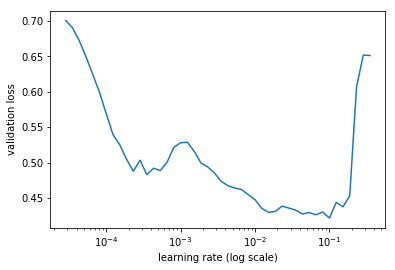

In [156]:
m.sched.plot(n_skip=5,n_skip_end=1)


In [157]:
lr = 1e-1

In [440]:
m.fit(lr, 2, metrics=[accuracy],cycle_len=1) #cross entropy


epoch      trn_loss   val_loss   accuracy                                                                              
    0      5.918599   0.335569   0.926     
    1      1.60437    0.263819   0.926                                                                                 



[array([0.26382]), 0.926]

In [489]:
m.fit(lr, 1, metrics=[accuracy], cycle_len=1)


epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.659695   0.308839   0.9256    



[array([0.30884]), 0.9256]

In [349]:
lr = 1e-3

In [350]:
m.fit(lr, 3, metrics=[accuracy], cycle_len=1)


epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.271109   0.264135   0.926     
    1      0.272276   0.264082   0.926                                                                                 
    2      0.269705   0.264079   0.926                                                                                 



[array([0.26408]), 0.926]

In [216]:
pred_test = m.predict_with_targs(is_test=True)

In [217]:
pred_test_pred = np.argmax(pred_test[0],axis=1)

In [159]:
pr_test = m.predict(is_test=True)

In [160]:
pr_test = np.argmax(pr_test,axis=1)

In [161]:
pr_test.shape

(54147,)

In [167]:
sum(pr_test)

18

In [163]:
df_test.SK_ID_CURR.shape, test.SK_ID_CURR.shape

((54147,), (54147,))

In [164]:
result = pd.DataFrame({"SK_CURR_ID":test.SK_ID_CURR, "TARGET": pr_test.astype("str")},
                      columns=["SK_CURR_ID","TARGET"])

In [165]:
result.to_csv(f"{PATH}submission.csv",index=False)

In [166]:
FileLink(f"{PATH}submission.csv")

C:\Users\Shota\Desktop\fastai\fastai\data\HOME_CREDIT\submission.csv

In [220]:
n_test = len(test)

In [218]:
len(pred_test_pred), len(pred_test[1])

(54147, 54147)

In [221]:
sum(pred_test_pred -pred_test[1].reshape(-1))/n_test

0.003361220381553918

In [394]:
preds = torch.max(torch.Tensor(x),dim=1)

In [417]:
incorrect = torch.sum(torch.abs((preds[1] - torch.LongTensor(y))))

In [418]:
incorrect/len(y)

0.1008

In [425]:
torch.max(torch.Tensor(x),dim=1)

(
 -0.2517
 -0.5626
 -0.1586
    ⋮   
 -0.0435
 -0.0127
 -0.0589
 [torch.FloatTensor of size 2500], 
  0
  0
  0
 ⋮ 
  0
  0
  0
 [torch.LongTensor of size 2500])

In [434]:
y[3]

0

In [440]:
(y==0).sum()

2315

# RandomForest

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [441]:
((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df.values, y)

In [442]:
m = RandomForestClassifier(n_estimators=40, max_features=0.99, min_samples_leaf=3,
                          n_jobs=-1, oob_score=True)
m.fit(trn, y_trn);

In [171]:
y_val.dtype

dtype('int64')

In [443]:
preds = m.predict(val)
m.score(trn, y_trn), m.score(val, y_val), m.oob_score_

(0.9590666666666666, 0.9252, 0.9214666666666667)

In [173]:
preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [477]:
def accur(x,y,df):
    return 1 - np.sum(np.abs(x-y))/df.shape[0]

In [478]:
accur(preds,y_val,df)

0.9814